<a href="https://colab.research.google.com/github/LbZy-3/PWD/blob/main/Copie_de_PWD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plane wave decomposition - Example 1 - Rayleigh resolution criterion


## Purpose

<img src="../img/Rayleigh.png" width="300" height="300">

This notebook shows how to simulate in python how scalar electromagnetic waves propagates from a nearfield source to the farfield. We check numerically the Rayleigh resolution criterion for an ideal optical lens of given numerical aperture

This method can be used to compute diffraction patterns through any screen apertures with a known transparency function (see example 2)




In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Some general parameters

In [2]:
u = 1         # length unit, e.g. 1 µm
wlen = 1* u      # wavelength in unit of u
N=601         # odd number of points in the screen 
size = 40*wlen   # size of the screen where the nearfield signal will be defined
distance = 2*wlen  # observation plane in the farfield


### Creating a nearfield pattern composed of two unit impulse signals separated by a distance D
according to the Rayleigh criterion the resution of an optical microscope is $R={{0.61\lambda} \over NA}$ we chose in this example $D=0.8 \lambda$ to be very closed to the resolution limit

(-5.0, 5.0)

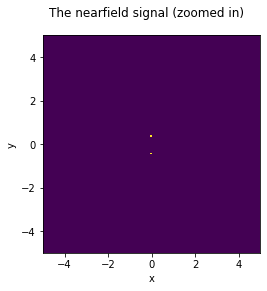

In [3]:
D=0.8*wlen            # separation distance 
Dpix=int(N*D/size)
x = np.linspace(-size/2,size/2,N)*u
y = x
sig = np.zeros((N,N))
sig[int((N-1)/2-Dpix/2),int((N-1)/2)] = 1
sig[int((N-1)/2+Dpix/2),int((N-1)/2)] = 1

# plot the nearfield signal
fig1, ax1 = plt.subplots()
pcm1=ax1.pcolor(x,y,sig)
ax1.axis('square')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig1.suptitle('The nearfield signal (zoomed in)')
ax1.set_xlim([-5*wlen,5*wlen])
ax1.set_ylim([-5*wlen,5*wlen])

### Array of spatial frequencies centered on 0, in rad per unit length u:

In [4]:
kx=np.zeros(N,dtype=complex)
freq_array1=np.linspace(-(N-1)/2,(N-1)/2,N)    # normalized spatial freq. in the signal    N -> L 
array2=freq_array1/(np.max(x)-np.min(x));      # spatial freq. in 1/x unit                 2 -> pmin  pmin=2*L/N  -> freqmax=N/2L 
kx = 2*np.pi*array2;                           # angular spatial freq in rad/x_unit  (wavenumber in ur case)
ky = kx  # because the screen is a square array of N by N elements
KX,KY = np.meshgrid(kx,ky)  # definition of grid arrays for vectorization computation

### FFT computation of the angular spectrum, several options (idem in matlab)

The plane wave decomposition (PWD) of a scalar field reads as $$\psi(x,y,z)=\iint_{-\infty }^{\infty }A(k_x,k_y)e^{j(k_x x+k_y y +k_z z)}dk_xdk_y$$
As an evidence, this PWD takes the form of a Fourier transform of the so-called angular spectrum $A(k_x,k_y)$ multiplied by a propagation function $e^{j(k_z z)}$ $$ \psi(x,y,z)=TF^{-1}\left\{ A(k_x,k_y)e^{j(k_z z)} \right\} \tag{1}$$
Thus to build the field at any distance $z$ from the nearfield plane source, we need first to determine $k_z(k_x,k_y)$ and $A(k_x,k_y)$  given by the dispersion relation of the plane waves and the Fourier transform of the field in the source plane $z=0$ $:$
$$ k_z(k_x,k_y)= \sqrt{({{2\pi}\over{\lambda}})^2 - k_x^2- k_y^2}$$ and $$ A(k_x,k_y) =TF\left\{ \psi(x,y,z=0) \right\} \tag{2}$$ 
So we first compute the angular spectrum with equ.(2) and then we use equ.(1) to build the far field. Both TF and inverse TF are computed with numpy FFT module wich is very similar to matlab FFT algorithm

In [5]:
# 1) Simplest expression: the spectrum have 0th freq at first point
#   can't be used here later on, cause we have centered our freq in middle 
#TF=np.fft.fft2(sig) # 
#SIG =np.fft.ifft(TF)

# 2) More common expression: the spectrum have 0th freq in middle
#TF=np.fft.fftshift(np.fft.fft2(sig)) 
#SIG =np.fft.ifft2(np.fft.ifftshift(TF))

#3) like 2) but phase Origin @center, (not @left as both 2 above)
TF=np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(sig)))
SIG=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TF)))


### Plot signal and angular spectrum in nearfield plane.
since the nearfield signal is an unit impulse, the angular spectrum is uniform (amplitude=1) 

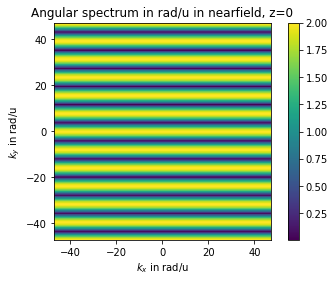

In [6]:

fig2, ax2 = plt.subplots()

pcm2 = ax2.pcolor(kx,ky,np.abs(TF))
ax2.axis('square')
ax2.set_xlabel(r'$k_x$ in rad/u')
ax2.set_ylabel(r'$k_y$ in rad/u')
ax2.set_title('Angular spectrum in rad/u in nearfield, z='+str(0))
plt.colorbar(pcm2,ax=ax2)

### Propagation in far field
the plane waves have to be propagated towards the far field with the use of the inverse fft

In [7]:
k=2*np.pi/wlen;   # wavenumber in vacuum
KZ=np.sqrt(k**2-KX**2-KY**2+0j) # Array of kz
H=np.exp(1j*KZ*distance)        # propagation function, since kz is an array, H is also an arra
TFz=TF*H;
SIGz=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TFz))); # <=use if choice (3)

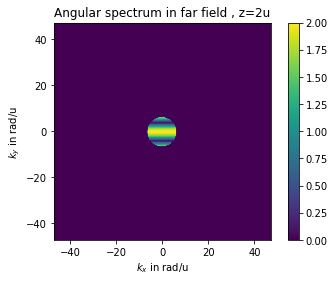

In [8]:
fig3, ax3 = plt.subplots()

pcm3 = ax3.pcolor(kx,ky,np.abs(TFz))
ax3.axis('square')
ax3.set_xlabel(r'$k_x$ in rad/u')
ax3.set_ylabel(r'$k_y$ in rad/u')
ax3.set_title('Angular spectrum in far field , z='+ str(distance)+'u')
plt.colorbar(pcm3,ax=ax3)


## The farfield pattern

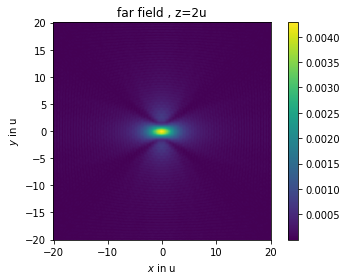

In [9]:
fig4, ax4 = plt.subplots()

pcm4 = ax4.pcolor(x,y,np.abs(SIGz))
ax4.axis('square')
ax4.set_xlabel(r'$x$ in u')
ax4.set_ylabel(r'$y$ in u')
ax4.set_title('far field , z='+ str(distance)+'u')
plt.colorbar(pcm4,ax=ax4)

## Image obtained with a perfect lens NA=1, and magnification =1
Propagation filters out high frequencies from the signal because they correspond to evanescent waves that exponentially decay as z is increasing. A way to compute the image of the nearfield signal obtained with a perfect lens of numerical aperture NA=1  is to apply a hat filter to remove the spatial frequencies carried by the evanescent waves. The remaining frequencies lie in a disk of radius $$k_0 = \sqrt {k_x^2+k_y^2}={2 \pi \over \lambda}$$.

(-5.0, 5.0)

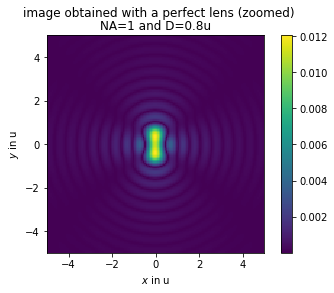

In [10]:
hat=np.zeros((N,N))
hat[np.where(np.imag(KZ)==0)]=1

SIGfocused=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TF*hat )));
fig5, ax5 = plt.subplots()

pcm5 = ax5.pcolor(x,y,(np.abs(SIGfocused)))
ax5.axis('square')
ax5.set_xlabel(r'$x$ in u')
ax5.set_ylabel(r'$y$ in u')
fig5.suptitle('image obtained with a perfect lens (zoomed)')
ax5.set_title('NA=1 and D='+str(D)+'u')
plt.colorbar(pcm5,ax=ax5)
ax5.set_xlim([-5*wlen,5*wlen])
ax5.set_ylim([-5*wlen,5*wlen])

now we examine the effect of NA lower than 1. The remaining frequencies lie in a disk of radius $$k_0 {NA}={2 \pi {NA}\over \lambda }$$.

(-10.0, 10.0)

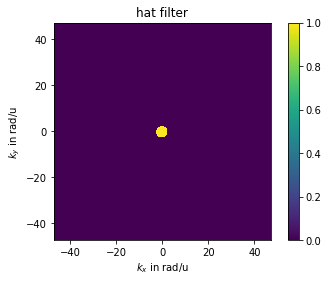

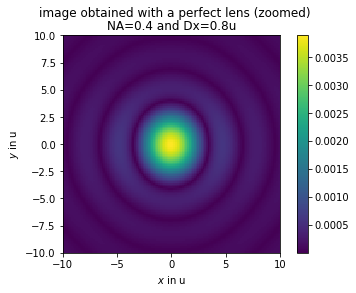

In [11]:
NA=0.4
hat=np.zeros((N,N))
hat[np.where(np.real(KX**2+KY**2)<=(2*np.pi/wlen*NA)**2)]=1

SIGfocused=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TF*hat )));
fig6, ax6 = plt.subplots()
pcm6 = ax6.pcolor(kx,ky,(np.abs(hat)))
ax6.axis('square')
ax6.set_xlabel(r'$k_x$ in rad/u')
ax6.set_ylabel(r'$k_y$ in rad/u')
ax6.set_title('hat filter')
plt.colorbar(pcm6,ax=ax6)
fig7, ax7 = plt.subplots()
pcm7 = ax7.pcolor(kx,ky,(np.abs(SIGfocused)))
ax7.axis('square')
ax7.set_xlabel(r'$x$ in u')
ax7.set_ylabel(r'$y$ in u')
fig7.suptitle('image obtained with a perfect lens (zoomed)')
ax7.set_title('NA='+str(NA)+' and Dx='+str(D)+'u')
plt.colorbar(pcm7,ax=ax7)
ax7.set_xlim([-10*wlen,10*wlen])
ax7.set_ylim([-10*wlen,10*wlen])